In [90]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
# Distribution Plots
# 1. distplot()    [single variable]
# 2. jointplot()   [two variable]
# 3. pairplot()    [all numarical column agains each other]
# .. rugplot()
# .. kdeplot()

tips = sns.load_dataset('tips')

In [45]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


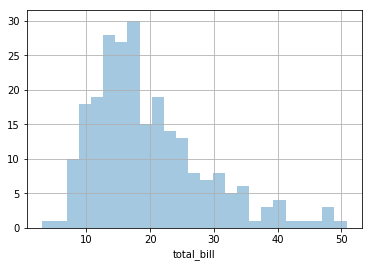

In [33]:
# Single column (single variable) plot. also known as histogram
sns.distplot(tips['total_bill'], kde=False, bins=25).grid(True)

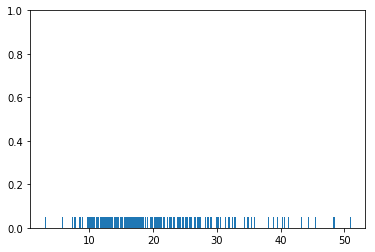

In [34]:
sns.rugplot(tips['total_bill'])

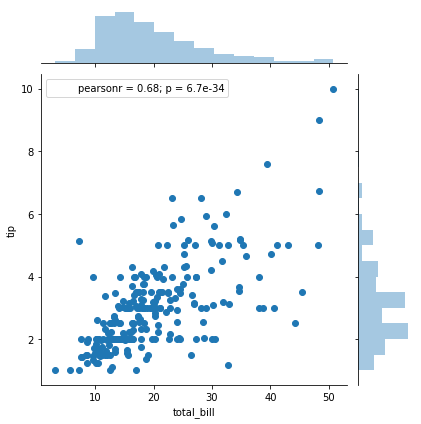

In [20]:
# Two column (two variable) plot
sns.jointplot(x='total_bill', y='tip', data=tips)

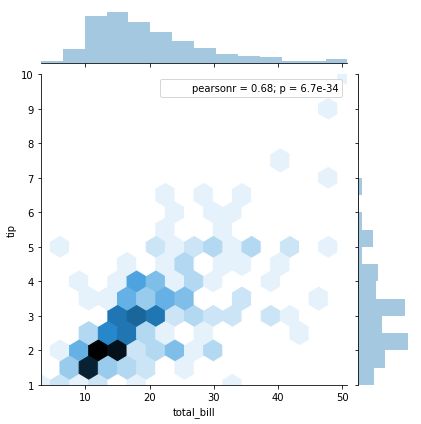

In [21]:
# Jointplot with Hexagon
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

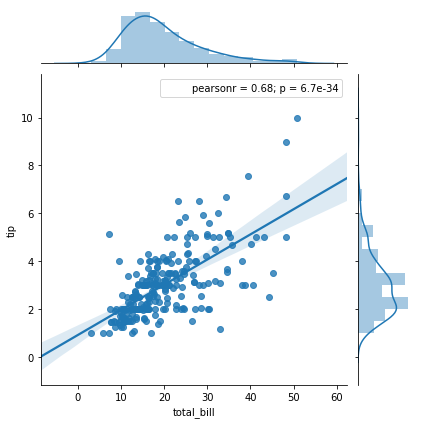

In [22]:
# Jointplot with Linear Regression
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

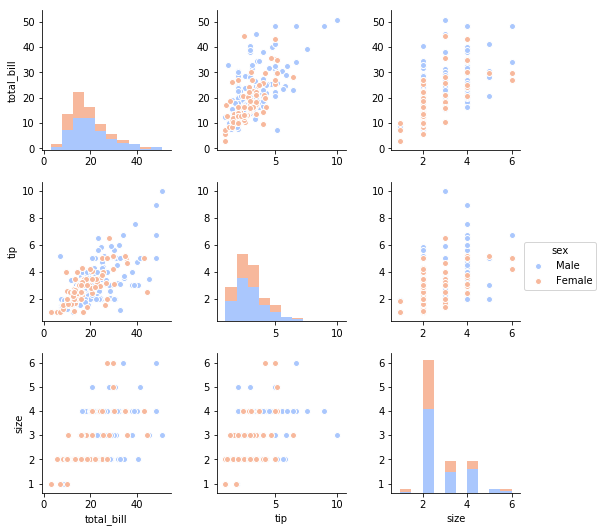

In [32]:
sns.pairplot(data=tips, hue='sex', palette='coolwarm')

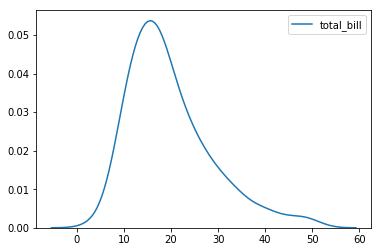

In [36]:
# Kernel Density Estimation of a column
sns.kdeplot(tips['total_bill'])

In [49]:
# Categorical Plots (a categorical column agains either a categorical or a numerical column)
# 1. barplot      [categorycal column vs categorical/numerical column]
# 2. countplot    [counts number of occurances for each category]
# 3. boxplot      [categorical axis (x) can be sub devided by another category using hue]
# 4. violinplot   [similar to box plot]
# 5. stripplot    [a scatterplot where x axis is categorical data. you can also split primary category with another category using hue]
# 6. swarmplot    [violinplot like stripplot]
# +. factorplot   [magic function to create any plot using the parameter 'kind']

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/Users/asishbiswas/miniconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


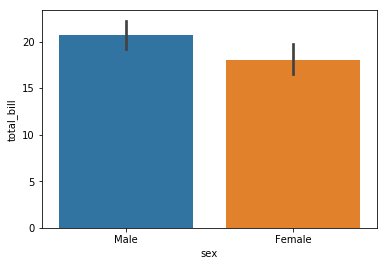

In [47]:
# A categorical column agains a numerical column
sns.barplot(x='sex', y='total_bill', data=tips)

/Users/asishbiswas/miniconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


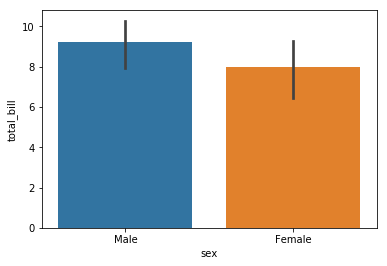

In [46]:
# barplot with standard deviation estimator
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std)

/Users/asishbiswas/miniconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


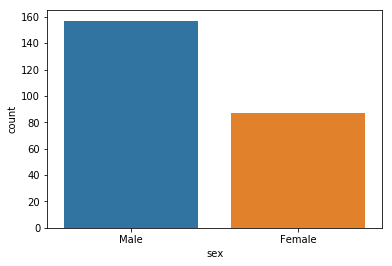

In [48]:
sns.countplot(x='sex', data=tips)

/Users/asishbiswas/miniconda3/lib/python3.6/site-packages/seaborn/categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


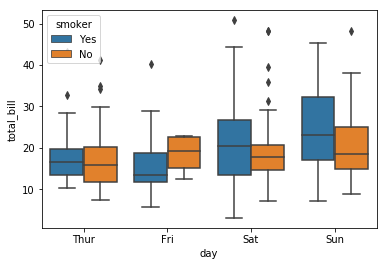

In [51]:
# categorical vs numeric. and the primary category is split into other categorical column
sns.boxplot(x='day', y='total_bill', data=tips, hue='smoker')

/Users/asishbiswas/miniconda3/lib/python3.6/site-packages/seaborn/categorical.py:647: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/Users/asishbiswas/miniconda3/lib/python3.6/site-packages/seaborn/categorical.py:895: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])
/Users/asishbiswas/miniconda3/lib/python3.6/site-packages/seaborn/categorical.py:915: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


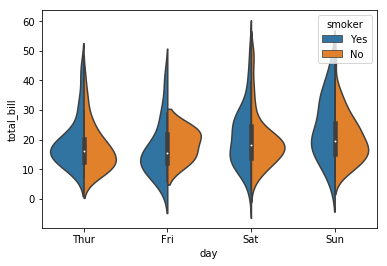

In [54]:
sns.violinplot(x='day', y='total_bill', data=tips, hue='smoker', split=True)

/Users/asishbiswas/miniconda3/lib/python3.6/site-packages/seaborn/categorical.py:2567: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


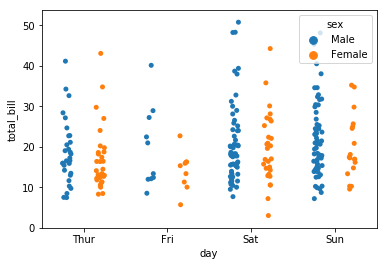

In [60]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True, hue='sex', split=True)

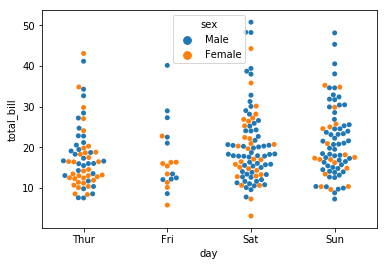

In [61]:
sns.swarmplot(x='day', y='total_bill', data=tips, hue='sex')

/Users/asishbiswas/miniconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/Users/asishbiswas/miniconda3/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


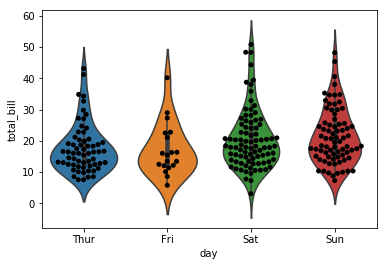

In [68]:
sns.violinplot(x='day', y='total_bill', data=tips)
sns.swarmplot(x='day', y='total_bill', data=tips, color='black')

In [69]:
# Matrix Plots (data should be in matrix form)
# 1. heatmap    [requires a matrix like data, similar to excel-spreadsheet with row and columns]
# 2. clustermap [shows matrix data as hierarchical data where similar data are closed to each other]

flights = sns.load_dataset('flights')

In [70]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [73]:
# For heatmap we must have one of the column value as row names which will form matrix with an existing column.
# and another column would be the actual value. Similar to excel-sheet: cell-value = C12 = column-row.
# Here we'll transform years as row names, and use passengers as the value for each matrix cell.

# pivot_table() helps us to transform flights data into a spreadsheet-style pivot table as a DataFrame.
fp = flights.pivot_table(index='year', columns='month', values='passengers')

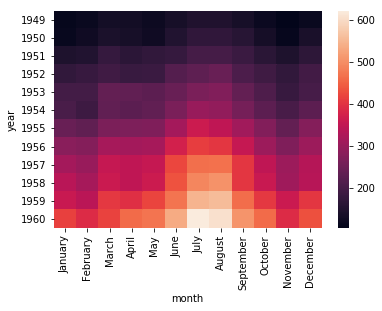

In [79]:
sns.heatmap(fp)

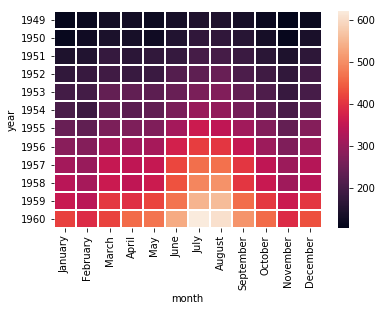

In [78]:
sns.heatmap(fp, cmap='magma', linewidth=1, linecolor='white')

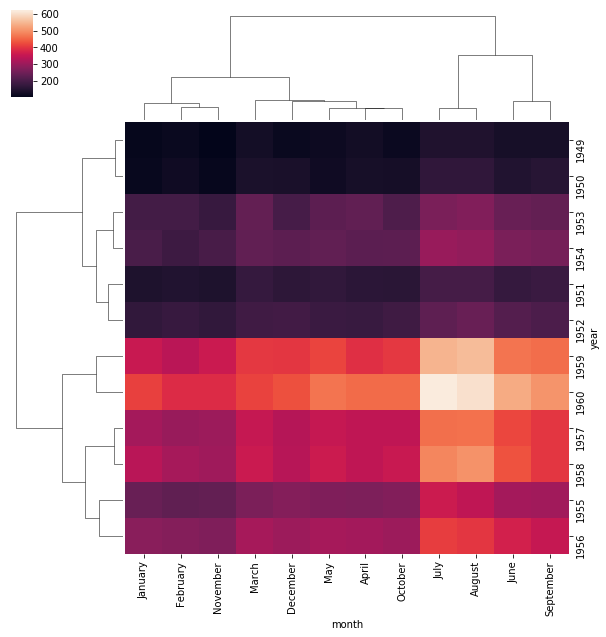

In [80]:
sns.clustermap(fp)

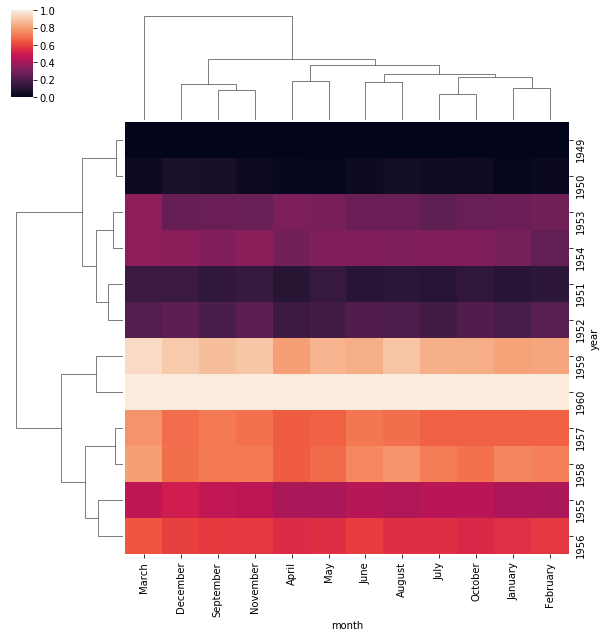

In [81]:
sns.clustermap(fp, standard_scale=1)

In [82]:
# Regration plots (machinelearning topic)
# 1. lmplot    [linier model plot]

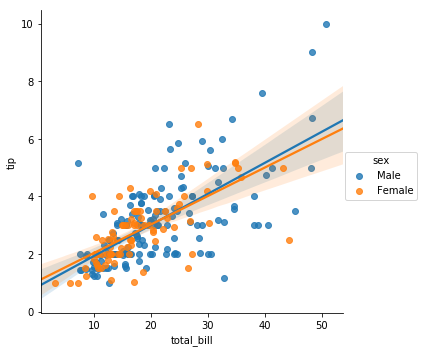

In [84]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex')

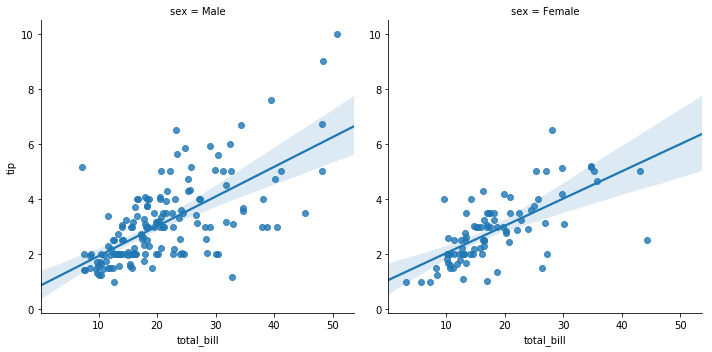

In [85]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='sex')

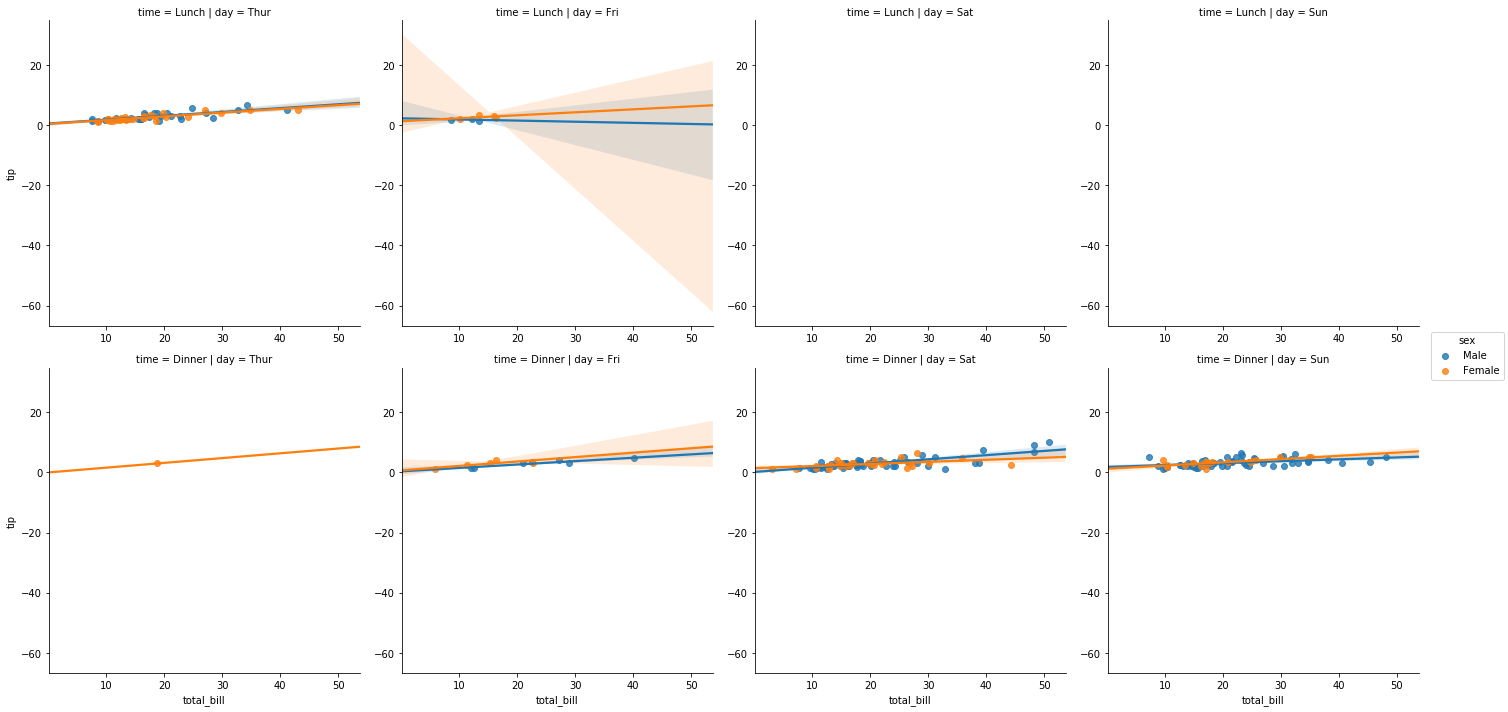

In [87]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='day', row='time', hue='sex')

In [89]:
# Grids
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/Users/asishbiswas/miniconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


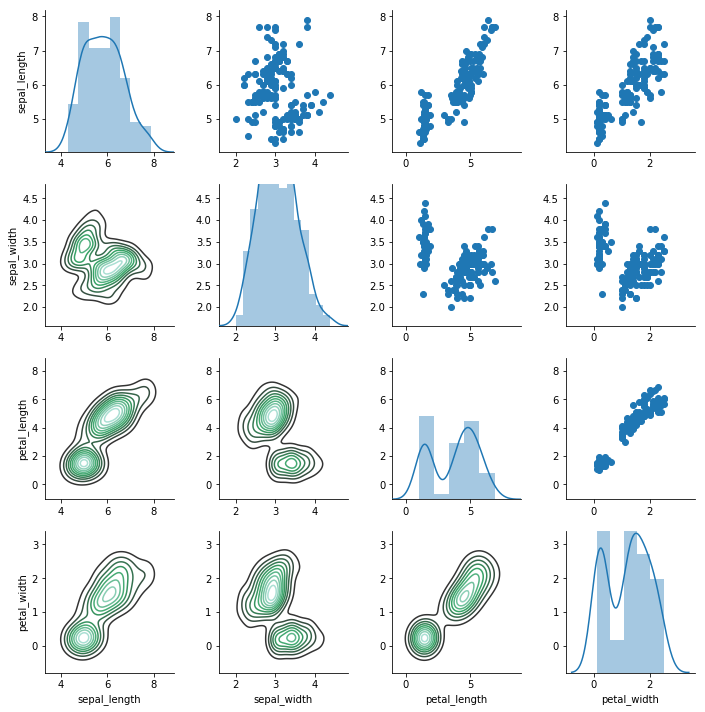

In [92]:
# more custom pairplot, where you can select which types of plot you want for subset of the grid
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

/Users/asishbiswas/miniconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


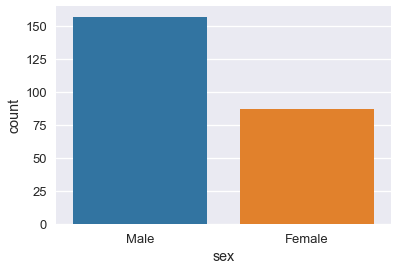

In [110]:
# Style and Color
sns.set_style('darkgrid') # background of the entire plot
sns.countplot(x='sex', data=tips)

/Users/asishbiswas/miniconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


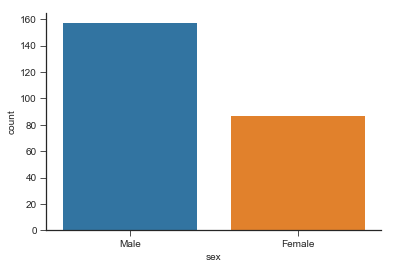

In [104]:
sns.set_style('ticks') # background of the entire plot
sns.countplot(x='sex', data=tips)
sns.despine()          # remove the lines from the edges

/Users/asishbiswas/miniconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


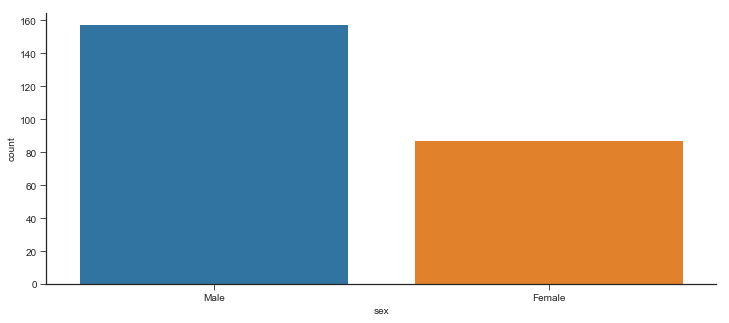

In [105]:
plt.figure(figsize=(12,5))      # you can use matplotlib in combination with seaborn
sns.countplot(x='sex', data=tips)
sns.despine()

/Users/asishbiswas/miniconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


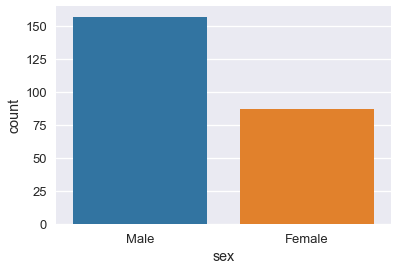

In [112]:
sns.set_context(context='talk')
sns.countplot(x='sex', data=tips)
sns.despine()

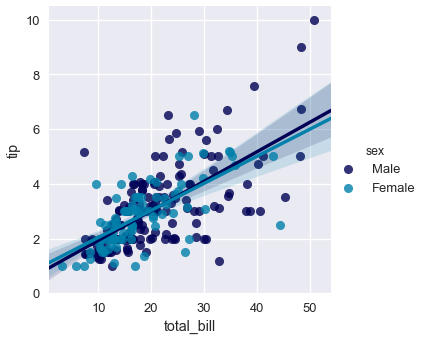

In [121]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', palette='ocean')